In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from PIL import Image

In [7]:
# Define paths to the folders
train_dir = '../data/train'
test_dir = '../data/test'
valid_dir = '../data/valid'

In [3]:
# Function to collect image paths and their respective labels
def get_image_paths_and_labels(folder_path):
    image_paths = []
    labels = []
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):
            for image_name in os.listdir(label_path):
                image_paths.append(os.path.join(label_path, image_name))
                labels.append(label)
    return image_paths, labels

In [8]:
# Get train, test, and validation data
train_paths, train_labels = get_image_paths_and_labels(train_dir)
test_paths, test_labels = get_image_paths_and_labels(test_dir)
valid_paths, valid_labels = get_image_paths_and_labels(valid_dir)

In [9]:
# Create DataFrames
train_df = pd.DataFrame({'image_path': train_paths, 'label': train_labels})
test_df = pd.DataFrame({'image_path': test_paths, 'label': test_labels})
valid_df = pd.DataFrame({'image_path': valid_paths, 'label': valid_labels})

In [10]:
# Combine all data
all_data_df = pd.concat([train_df, test_df, valid_df], ignore_index=True)

In [11]:
all_data_df.tail(20)

,image_path,label
1008,../data/valid\Magnesium Deficiency\magnesium-d...,Magnesium Deficiency
1009,../data/valid\Magnesium Deficiency\magnesium-d...,Magnesium Deficiency
1010,../data/valid\Manganese Deficiency\11dce0_f9b0...,Manganese Deficiency
1011,../data/valid\Manganese Deficiency\OIP-6Djb8A6...,Manganese Deficiency
1012,../data/valid\Manganese Deficiency\OIP-EubNTGh...,Manganese Deficiency
1013,../data/valid\Nitrogen Deficiency\nitrogen-def...,Nitrogen Deficiency
1014,../data/valid\Nitrogen Deficiency\nitrogen-def...,Nitrogen Deficiency
1015,../data/valid\Nitrogen Deficiency\nitrogen-def...,Nitrogen Deficiency
1016,../data/valid\Nitrogen Deficiency\nitrogen-def...,Nitrogen Deficiency
1017,../data/valid\PH Fluctuation\Cannabis-weed-PH-...,PH Fluctuation


In [12]:
class_distribution = all_data_df['label'].value_counts()
print(class_distribution)

label
Healthy                  106
Manganese Deficiency     106
Phosphorus Deficiency     99
Potassium Deficiency      90
Calcium Deficiency        88
PH Fluctuation            86
Sulfur Deficiency         86
Iron Deficiency           82
Nitrogen Deficiency       77
Aphids                    76
Magnesium Deficiency      66
Powdery Mildew            66
Name: count, dtype: int64


<Axes: title={'center': 'Class Distribution'}, xlabel='label'>

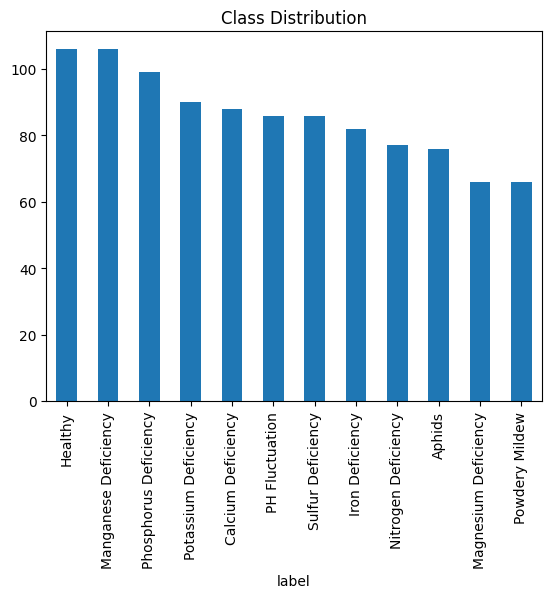

In [21]:
class_distribution.plot(kind='bar', title='Class Distribution')

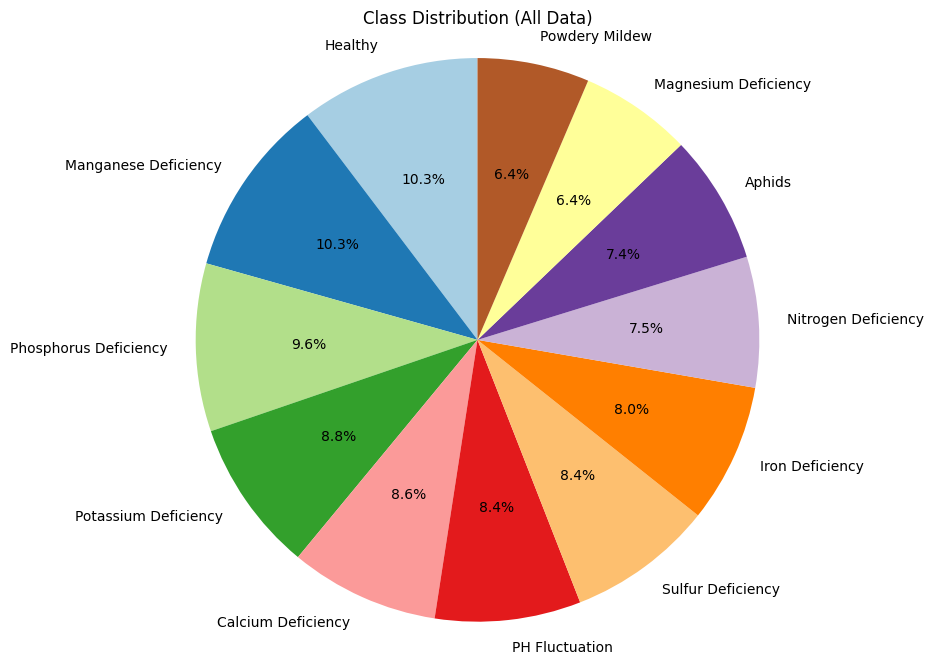

In [18]:
# Pie chart for general class distribution
plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Class Distribution (All Data)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [13]:
print("Training set size:", len(train_df))
print("Test set size:", len(test_df))
print("Validation set size:", len(valid_df))

Training set size: 955
Test set size: 38
Validation set size: 35


In [14]:
def display_sample_images(dataframe, label, n=5):
    sample_images = dataframe[dataframe['label'] == label].sample(n)
    plt.figure(figsize=(15,5))
    for i, img_path in enumerate(sample_images['image_path']):
        img = mpimg.imread(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    plt.show()

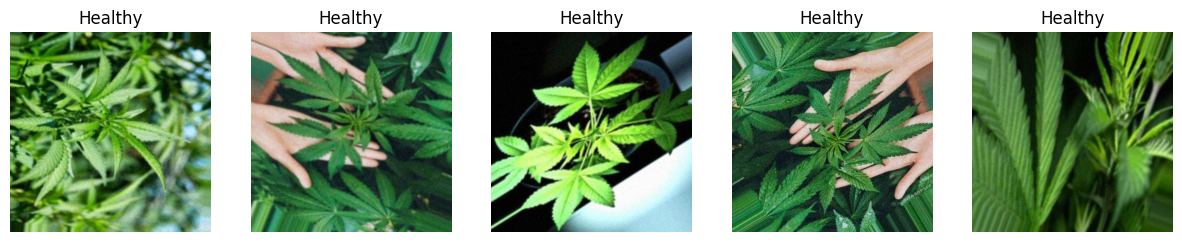

In [15]:
# Display 5 random samples from the "Healthy" class
display_sample_images(train_df, 'Healthy', n=5)

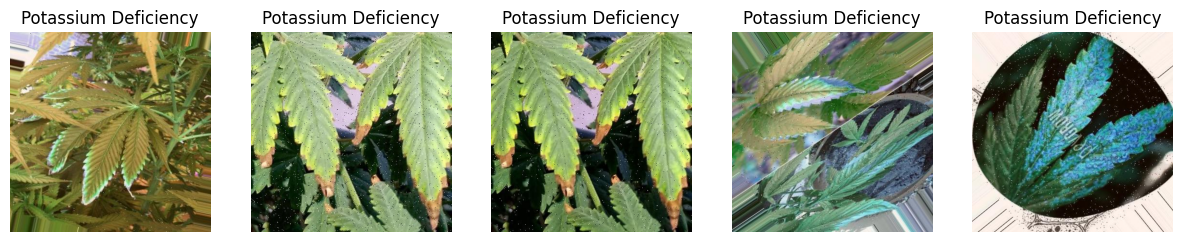

In [16]:
# Display 5 random samples from the "Potassium Deficiency" class
display_sample_images(train_df, 'Potassium Deficiency', n=5)

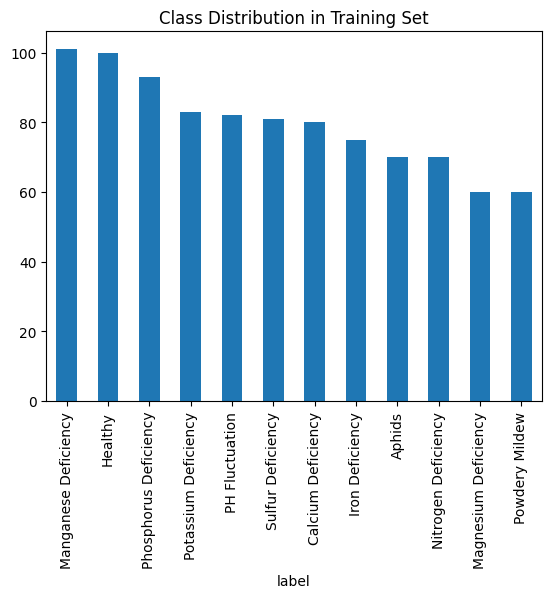

In [17]:
# Visualize class distribution
train_df['label'].value_counts().plot(kind='bar', title='Class Distribution in Training Set')
plt.show()

In [19]:
# Training set class distribution
train_class_distribution = train_df['label'].value_counts()

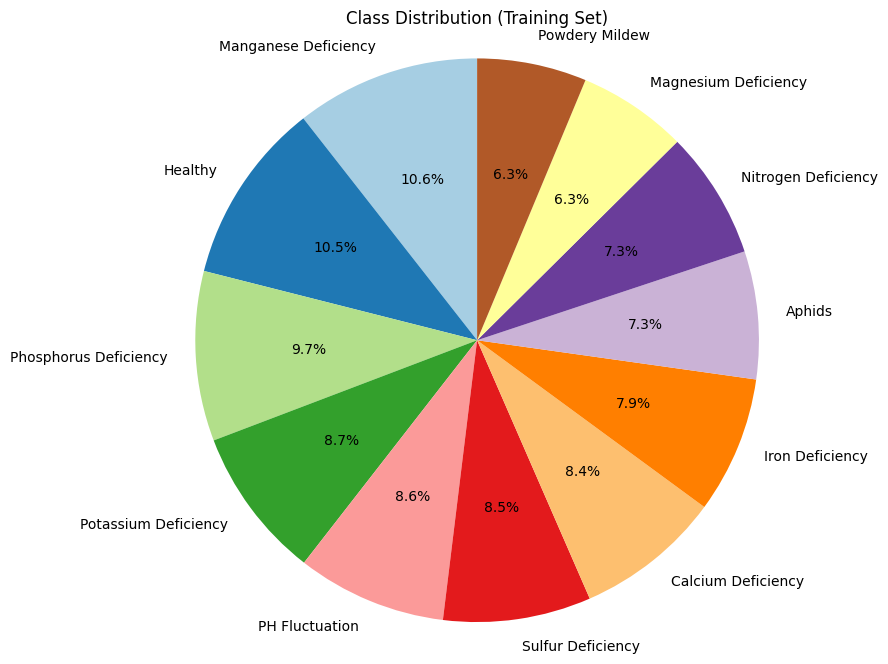

In [20]:
# Pie chart for training set class distribution
plt.figure(figsize=(8, 8))
plt.pie(train_class_distribution, labels=train_class_distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Class Distribution (Training Set)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()